#**Income inequality and an innovative approach to its measures**

### **Nikola Dugandzija**

#**1. Data Loading**


The dataset was imported using the **pandas** library from an Excel file. The dataset contains information on income inequality indicators across various countries.

To streamline the analysis, only the relevant columns were retained, excluding those beyond the **'Year'** column, as they were deemed unnecessary for the study.

After the preprocessing step, the first few rows of the dataset were displayed to verify that the data was correctly loaded and structured.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/Data for Python.xlsx"
data = pd.read_excel(file_path)

# Keeping only columns up to 'Year', since it is not important in the analysis
data = data.loc[:, :'Year']


print("\nFirst few rows of the dataset after dropping unnecessary columns:")
print(data.head(10))



First few rows of the dataset after dropping unnecessary columns:
   Rank              Country  Median Income  Mean Income  \
0     1         Turkmenistan            706          963   
1     2           Uzbekistan            591          752   
2     3           Kazakhstan           3661         4313   
3     4             Slovakia           9037         9505   
4     5                 Iraq           1951         2293   
5     6  Trinidad and Tobago           2868         3711   
6     7              Algeria           2612         2996   
7     8              Iceland          20630        22988   
8     9              Moldova           3133         3590   
9    10              Georgia           2273         2814   

   GDP per Capita (PPP)  Gini coefficient (World Bank)  Coefficient       Year  
0                 15206                           40.8     0.016901  2006-2012  
1                  7308                           31.2     0.022031  2006-2012  
2                 27517      

#**2. Data Cleaning and Organization**


### **Renaming Columns**
To improve clarity, the **'coefficient'** column was renamed to **'MMG'**, ensuring consistency in terminology throughout the analysis.


In [4]:
data.rename(columns={'coefficient': 'MMG'}, inplace=True)

### **Handling Missing Values** **bold text**
A preliminary check was conducted to identify missing values in the dataset. The `isnull().sum()` function was used to count the number of missing entries in each column, allowing us to assess data completeness before proceeding with further analysis.

In [5]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Rank                             0
Country                          0
Median Income                    0
Mean Income                      0
GDP per Capita (PPP)             0
Gini coefficient (World Bank)    0
Coefficient                      0
Year                             0
dtype: int64


#**3. Descriptive Statistics**

To gain an initial understanding of the **MMG (Mean-Median-GDP) ratio**, descriptive statistics were computed. The analysis included key summary metrics such as:

- **Mean**: The average MMG value across all observations.
- **Standard Deviation**: A measure of the variability of MMG values.
- **Minimum and Maximum**: The range of MMG values observed.
- **Quartiles**: Including the median, which provides insight into the distribution of MMG.

This step helps in understanding the general distribution of MMG across different countries before performing deeper analysis.

In [8]:
print("Descriptive statistics for MMG:")
print(data['Coefficient'].describe())

Descriptive statistics for MMG:
count    147.000000
mean       0.123006
std        0.101353
min        0.016901
25%        0.059481
50%        0.084499
75%        0.156215
max        0.695925
Name: Coefficient, dtype: float64


#**4. Artificial Examples of Application**

###**An Artificial Example of MMG ratio and its properties**
To illustrate how the **MMG** behaves under different economic conditions, three hypothetical countries were created:
- **Country X**: Represents a highly unequal society with a significant gap between mean and median income.
- **Country Y**: Represents a moderately equal society with mean and median incomes close to each other.
- **Country Z**: Represents a country with noticeable but not extreme inequality.

For each country, the following variables were defined:
- **Mean Income**: The average income across all individuals.
- **Median Income**: The income level at the middle of the distribution.
- **GDP per Capita**: The economic output per person.
- **MMG**: The computed value using the formula:
$$
MMG = \frac{\text{Mean Annual Income} - \text{Median Annual Income}}{\text{GDP per Capita}}
$$

A custom **color palette** was also defined to enhance the visualization of these artificial examples.

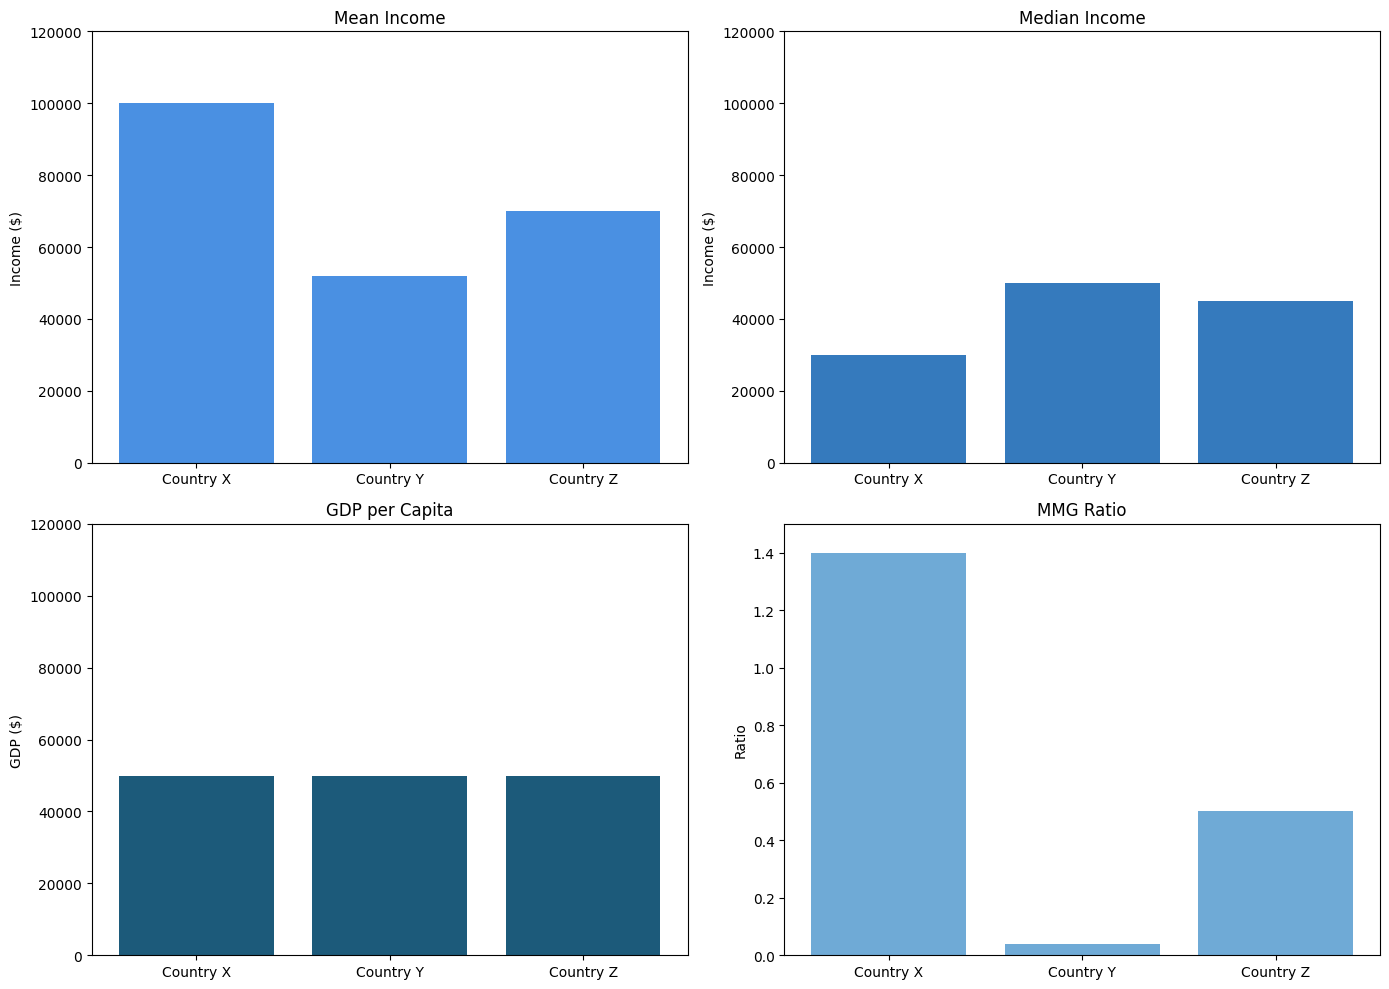

In [20]:
# Data for the countries
countries = ['Country X', 'Country Y', 'Country Z']
mean_income = [100000, 52000, 70000]
median_income = [30000, 50000, 45000]
gdp_per_capita = [50000, 50000, 50000]
mmg_ratio = [1.4, 0.04, 0.5]

# Color palette
colors = ['#4A90E2', '#357ABD', '#6FAAD6', '#1C5A7A']

# Figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Mean Income Bar Chart
axs[0, 0].bar(countries, mean_income, color=colors[0])
axs[0, 0].set_title('Mean Income')
axs[0, 0].set_ylabel('Income ($)')
axs[0, 0].set_ylim(0, 120000)

# Median Income Bar Chart
axs[0, 1].bar(countries, median_income, color=colors[1])
axs[0, 1].set_title('Median Income')
axs[0, 1].set_ylabel('Income ($)')
axs[0, 1].set_ylim(0, 120000)

# GDP per Capita Bar Chart
axs[1, 0].bar(countries, gdp_per_capita, color=colors[3])
axs[1, 0].set_title('GDP per Capita')
axs[1, 0].set_ylabel('GDP ($)')
axs[1, 0].set_ylim(0, 120000)

# MMG Ratio Bar Chart
axs[1, 1].bar(countries, mmg_ratio, color=colors[2])
axs[1, 1].set_title('MMG Ratio')
axs[1, 1].set_ylabel('Ratio')
axs[1, 1].set_ylim(0, 1.5)

# Layout and plot
plt.tight_layout()
plt.show()


#**5. Distribution of MMG**

###**Distribution of MMG**

To analyze the distribution of the **MMG**, a histogram with a **Kernel Density Estimation (KDE) curve** was plotted. This visualization provides insight into the spread and shape of MMG values across different countries.

- **Histogram**: Shows the frequency distribution of MMG values.
- **KDE curve**: Provides a smoothed representation of the probability density function, highlighting trends in the data.
- **Grid lines**: Improve readability by making it easier to interpret the frequency distribution.

This step helps determine whether MMG values are normally distributed, skewed, or exhibit other notable patterns.

The distribution of MMG values exhibits **right-skewness**, indicating that most countries have relatively **low MMG values**, while a smaller number of countries have significantly higher values. The peak around **0.1** suggests that the majority of observed countries cluster around this range, reflecting a relatively small difference between mean and median incomes in proportion to GDP per capita. The long right tail suggests that **a few countries experience extreme income inequality**, where the mean income is substantially higher than the median.


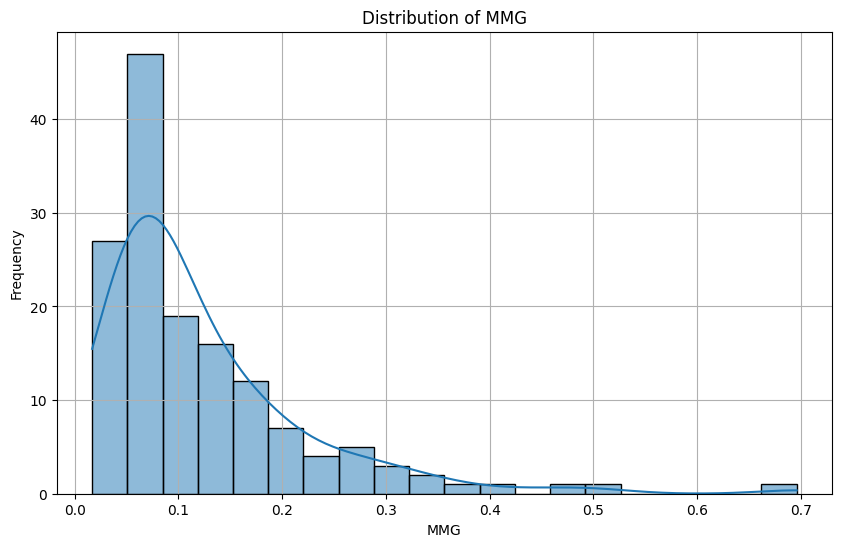

In [19]:
# Histogram with KDE for MMG
plt.figure(figsize=(10, 6))
sns.histplot(data['Coefficient'], bins=20, kde=True)
plt.title('Distribution of MMG')
plt.xlabel('MMG')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#**6. Outlier Detection**

###**Box Plot for Outlier Detection**
A **box plot** was generated to visualize the spread of MMG values and identify potential **outliers**. The box plot provides insights into the distribution of MMG and highlights extreme values that deviate significantly from the majority of observations.

#### Interpretation:
- The **interquartile range (IQR)** was calculated as the difference between the **first quartile (Q1)** and the **third quartile (Q3)**.
- **Outliers** were defined as values that fall outside **1.5 × IQR** from Q1 and Q3.
- The **whiskers** represent the range of data within the accepted range, while **outliers** are marked as orange dots beyond the whiskers.

#### Findings:
The analysis detected **9** outliers, indicating that a subset of countries exhibits extreme MMG values. These cases may represent economies with exceptionally high or low disparities between **mean and median income relative to GDP per capita**, warranting further investigation.

The presence of outliers suggests that income inequality varies significantly across countries, with some economies deviating strongly from the general trend.

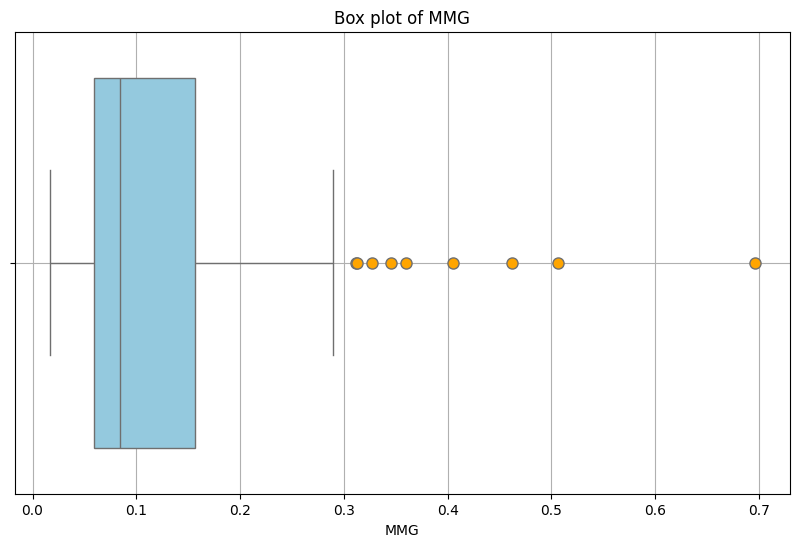

Number of outliers in MMG: 9


In [16]:
# Box plot for MMG
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Coefficient'], color='skyblue', flierprops=dict(marker='o', markerfacecolor='orange', markersize=8))
plt.title('Box plot of MMG')
plt.xlabel('MMG')
plt.grid(True)
plt.show()

Q1 = data['Coefficient'].quantile(0.25)
Q3 = data['Coefficient'].quantile(0.75)
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Coefficient'] < lower_bound) | (data['Coefficient'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Number of outliers in MMG: {num_outliers}")

#**7. Regression Analysis**

###**Scatter plot with Regression line for MMG and Gini Coefficient**

A **linear regression model** was applied to analyze the relationship between the **MMG** and the **Gini coefficient**.

#### Interpretation:
- The **scatter plot** visualizes individual country data points, showing how MMG values correspond to the Gini coefficient.
- The **blue regression line** represents the best linear fit for the data.
- The **equation of the regression line** is:

  $$
  y = {43.14}x + {31.66}
$$

  where:
  - **\( y \)** represents the **Gini coefficient**,
  - **\( x \)** represents the **MMG**,
  - **\( 43.14 \)** is the estimated slope, indicating that for every **1-unit increase in MMG**, the **Gini coefficient increases by 43.14 points**,
  - **\( 31.66 \)** is the intercept, representing the expected Gini coefficient when MMG is **zero**.

#### Findings:
- The **positive slope** suggests a **moderate to strong positive correlation**, meaning that **higher MMG values** are generally associated with **higher income inequality** (higher Gini coefficient).
- The **spread of data points** indicates that while MMG and Gini coefficient are related, other factors likely contribute to variations in income inequality.

This regression analysis supports the hypothesis that **MMG serves as a complementary metric** to the Gini coefficient in measuring income inequality.

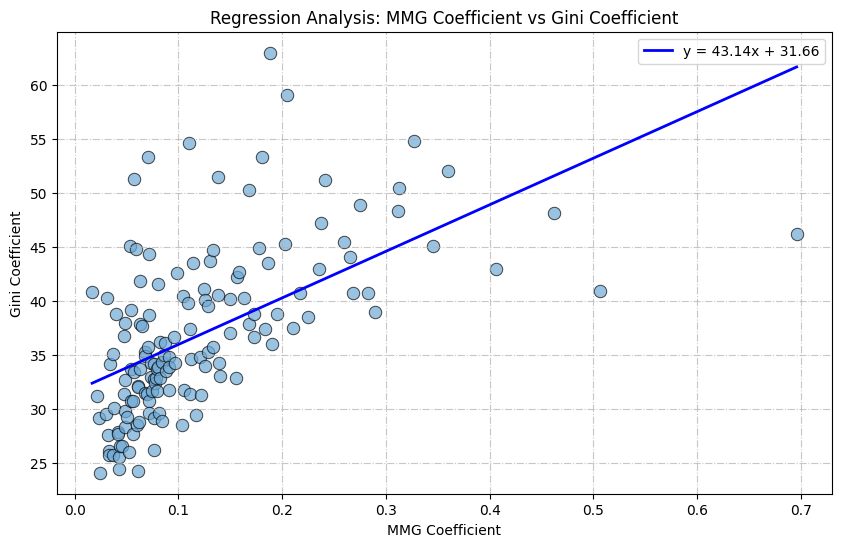

In [9]:
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x=data['Coefficient'], y=data['Gini coefficient (World Bank)'], color='#6FAAD6', s=80, edgecolor='k', alpha=0.7)

# Fitting a regression line
slope, intercept = np.polyfit(data['Coefficient'], data['Gini coefficient (World Bank)'], 1)
plt.plot(data['Coefficient'], slope * data['Coefficient'] + intercept, color='blue', linewidth=2, label=f"y = {slope:.2f}x + {intercept:.2f}")

plt.xlabel("MMG Coefficient")
plt.ylabel("Gini Coefficient")
plt.title("Regression Analysis: MMG Coefficient vs Gini Coefficient")
plt.legend()

plt.grid(True, linestyle='-.', alpha=0.7)
plt.show()


# **8. Correlation Analysis**

###**Correlation Matrix**

To explore the relationships between numerical variables in the dataset, a **correlation matrix** was computed and visualized using a heatmap.

#### Data Processing:
- **Numeric column selection**: Only numerical variables were retained for analysis.
- **Variance filtering**: Columns with **zero variance** (constant values) were removed to avoid redundancy.

#### Heatmap Interpretation:
- The **heatmap** visually represents the correlations, where:
  - **Values close to +1** indicate a **strong positive correlation**.
  - **Values close to -1** indicate a **strong negative correlation**.
  - **Values around 0** suggest **little to no correlation**.
- Strong correlations suggest potential dependencies between variables, while weak correlations indicate independent relationships.



Correlation matrix:
                                   Rank  Median Income  Mean Income  \
Rank                           1.000000      -0.268490    -0.221357   
Median Income                 -0.268490       1.000000     0.995802   
Mean Income                   -0.221357       0.995802     1.000000   
GDP per Capita (PPP)          -0.453986       0.895023     0.895091   
Gini coefficient (World Bank)  0.623784      -0.437697    -0.382372   
Coefficient                    0.828657      -0.220816    -0.178819   

                               GDP per Capita (PPP)  \
Rank                                      -0.453986   
Median Income                              0.895023   
Mean Income                                0.895091   
GDP per Capita (PPP)                       1.000000   
Gini coefficient (World Bank)             -0.371021   
Coefficient                               -0.351675   

                               Gini coefficient (World Bank)  Coefficient  
Rank               

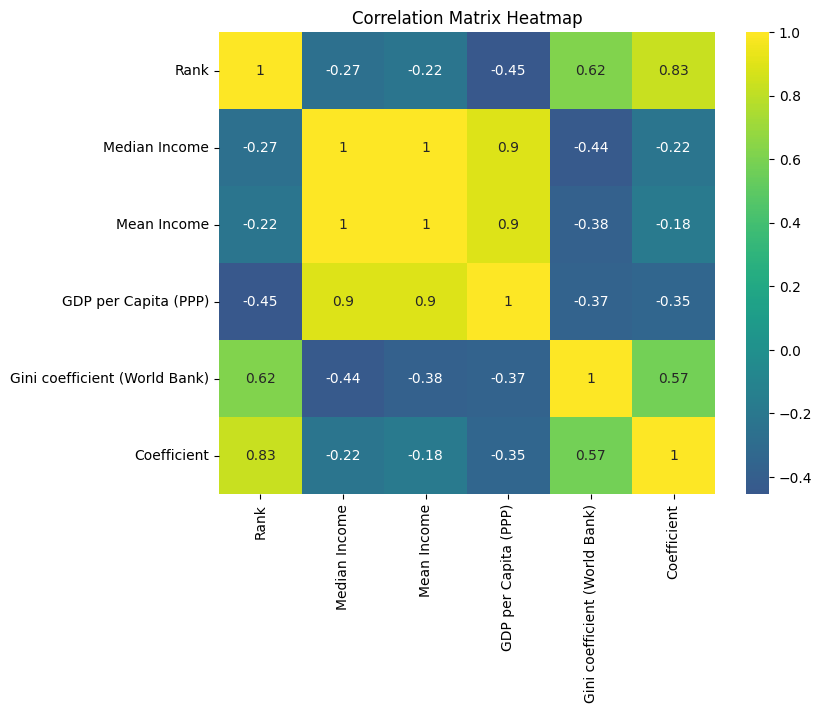

In [7]:
# Numeric column selection
numeric_data = data.select_dtypes(include=['number'])

# Dropping columns with zero variance (constant columns)
numeric_data = numeric_data.loc[:, numeric_data.var() != 0]

# Correlation matrix for numeric variables
corr_matrix = numeric_data.corr()
print("\nCorrelation matrix:")
print(corr_matrix)

# Heatmap for visualization of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


###**Map of Gini Coefficient Distribution**

To analyze the **global distribution of income inequality**, a **choropleth map** was created using **GeoPandas** and **Natural Earth data**.

#### Data Processing:
- **Downloading and loading world map data**: The **Natural Earth low-resolution dataset** was downloaded and loaded using **GeoPandas**.
- **Importing Gini coefficient data**: A dataset containing **Gini coefficients** for various countries was loaded from an external Excel file.
- **Merging datasets**: The Gini coefficient data was merged with the **geospatial world map** based on country names.
- **Data conversion**: Gini coefficient values were converted to **numeric format** to ensure correct visualization.

#### Visualization:
- **Choropleth map**:
  - Countries **without available Gini data** are displayed in **light grey**.
  - Countries **with available Gini data** are shaded according to their **inequality level**, using the **"viridis" colormap**.
  - The legend provides a **clear scale** of Gini coefficients for interpretation.
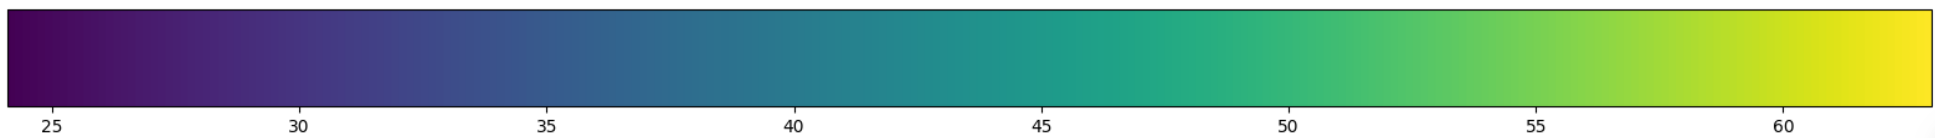

#### Interpretation:
- **Higher Gini coefficients** (lighter colors) indicate **greater income inequality**.
- **Lower Gini coefficients** (darker colors) indicate **more equal income distribution**.
- The map highlights **regional differences** in income inequality, providing a global perspective on economic disparity.

This visualization enables a **quick comparative analysis** of income inequality across different countries, aiding in the identification of **patterns and regional trends**.

--2025-01-28 22:40:55--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.92.210.233, 52.92.242.201, 52.92.147.1, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.92.210.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K  1.09MB/s    in 0.2s    

2025-01-28 22:40:56 (1.09 MB/s) - ‘ne_110m_admin_0_countries.zip’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
  inflating: ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries.dbf  
  inflating: ne_110m_admin_0_countries.prj  
  inflating: ne_110m_admin_0_countries.shp  
  inflating: ne_110m_admin_0_countr

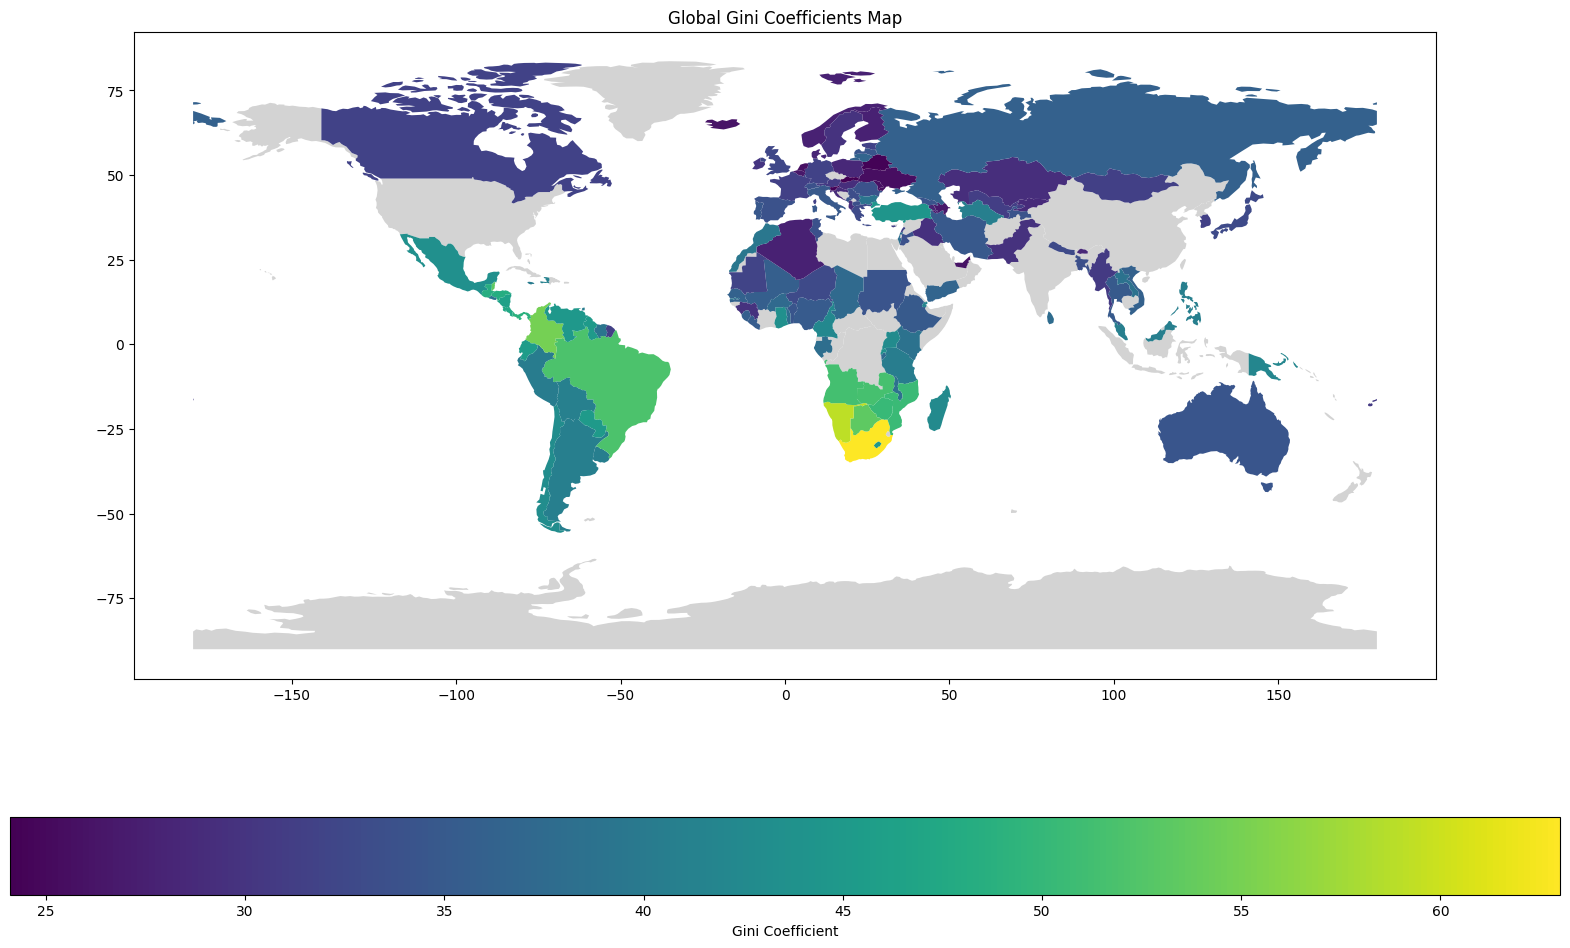

In [8]:
import geopandas as gpd


# Download of the Natural Earth low-resolution data
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

# Loading the world map
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Loading Gini Coefficinet data
gini_data = pd.read_excel('/content/Data for Python.xlsx', sheet_name='Sheet1')

# Head of table with data
print(gini_data.head())

# Merging of the Gini data with the world GeoDataFrame
world = world.merge(gini_data, how="left", left_on="NAME", right_on="Country") # Changed 'name' to 'NAME' to match column name in Natural Earth data

# Conversion of Gini coefficients to numeric
world['Gini coefficient (World Bank)'] = pd.to_numeric(world['Gini coefficient (World Bank)'], errors='coerce')

# Data after the merge
print(world[['NAME', 'Gini coefficient (World Bank)']].head())

# Map
fig, ax = plt.subplots(1, figsize=(20, 12))
base = world[world['Gini coefficient (World Bank)'].isna()].plot(ax=ax, color='lightgrey')
world.dropna(subset=['Gini coefficient (World Bank)']).plot(ax=base, column='Gini coefficient (World Bank)',
                                                            legend=True, legend_kwds={'label': "Gini Coefficient", 'orientation': "horizontal"},
                                                            cmap='viridis')
plt.title('Global Gini Coefficients Map')
plt.show()

###**Map of MMG Distribution**

To provide a **global perspective on income inequality**, a **choropleth map** of **MMG** was created. This visualization helps identify geographic patterns in the disparity between **mean and median incomes** relative to GDP per capita.

#### Data Processing:
- **Conversion to numeric format**: The MMG was converted to a numeric format to ensure proper mapping.
- **Handling missing data**:
  - Countries **without available MMG data** are shown in **light grey**.
  - Countries **with available MMG data** are displayed using a color gradient.
- **Choropleth mapping**: The **"viridis" colormap** was used to visually differentiate MMG values across countries.
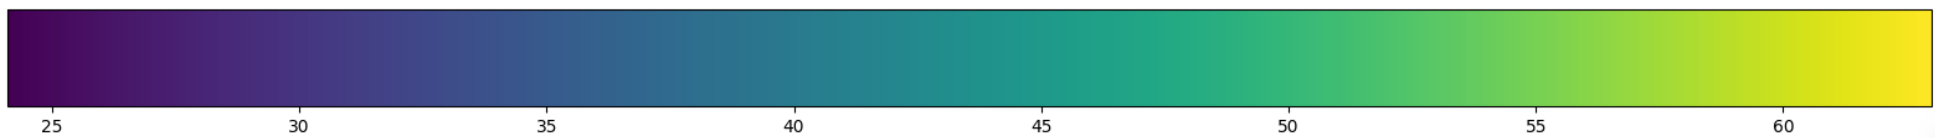

#### Interpretation:
- **Darker shades** represent **lower MMG values**, indicating greater income inequality.
- **Lighter shades** indicate **higher MMG values**, suggesting a more balanced income distribution.
- The **legend** provides a reference scale for interpreting MMG ratios.

This visualization allows for a **comparative analysis of MMG across different regions**, helping to highlight areas where the disparity between mean and median incomes is most pronounced.

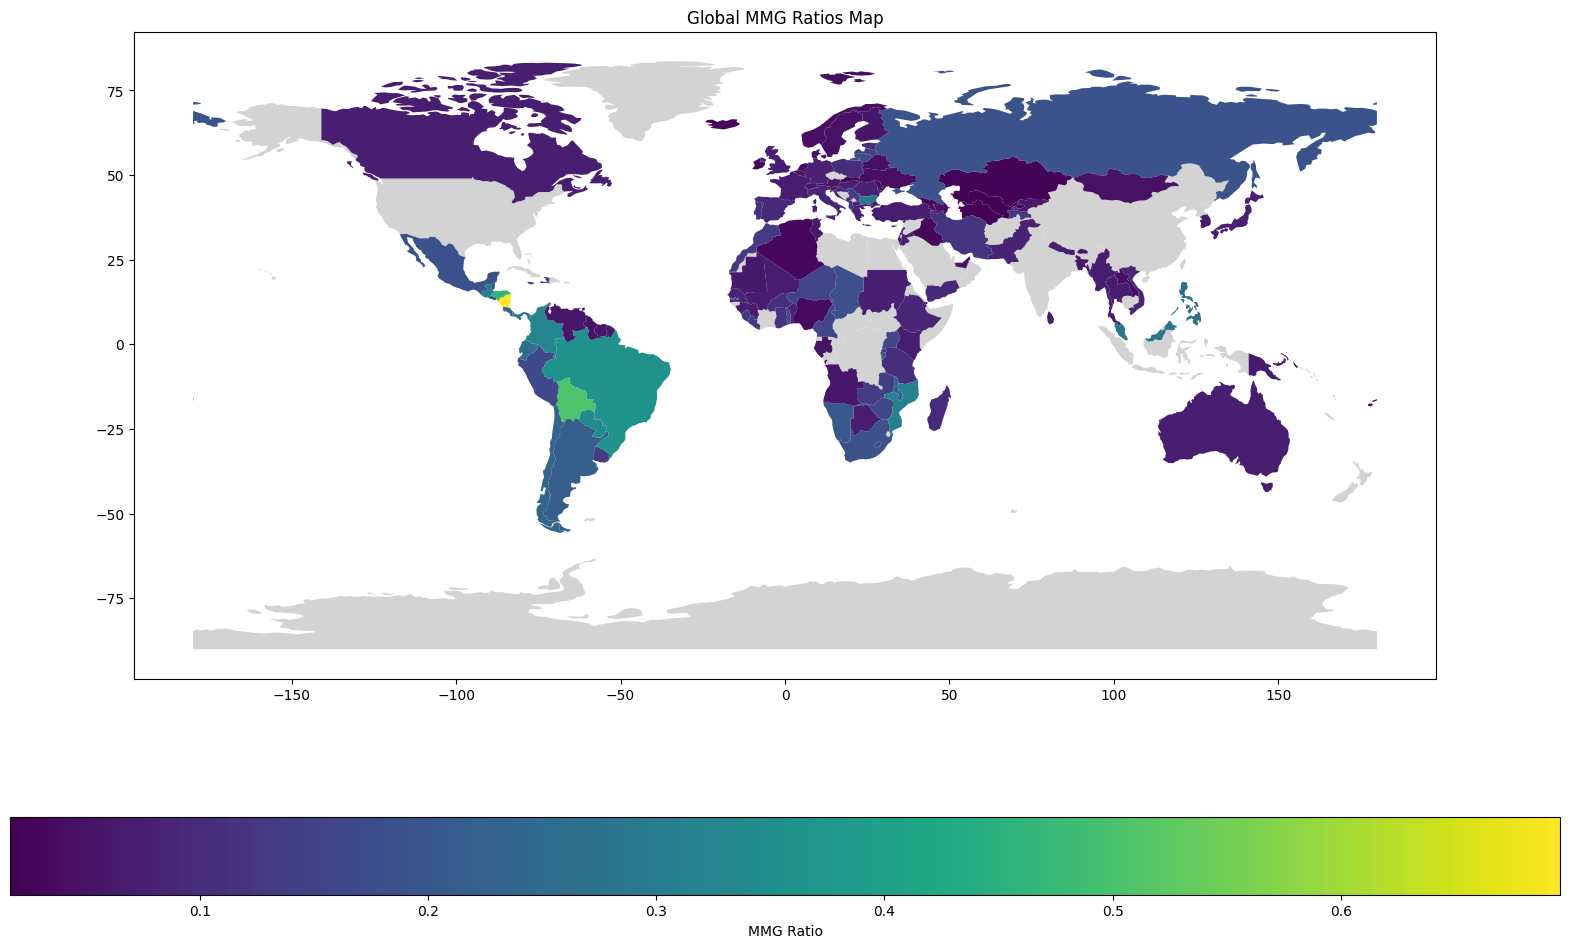

In [22]:
import geopandas as gpd

# Conversion of MMG to numeric
world['Coefficient'] = pd.to_numeric(world['Coefficient'], errors='coerce')

# Map
fig, ax = plt.subplots(1, figsize=(20, 12))
base = world[world['Coefficient'].isna()].plot(ax=ax, color='lightgrey')
world.dropna(subset=['Coefficient']).plot(ax=base, column='Coefficient',
                                          legend=True, legend_kwds={'label': "MMG Ratio", 'orientation': "horizontal"},
                                          cmap='viridis')
plt.title('Global MMG Ratios Map')
plt.show()


### **Spearman's Rank Correlation Analysis**

The **Spearman’s rank correlation test** was applied to measure the strength and direction of the relationship between **MMG and Gini coefficients** across countries.

#### Formula:
$$
r_s = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)} = 0.654
$$

where:
- **$ d_i $**: The difference between the ranks of MMG and Gini coefficient for each country.
- **$n$**: The total number of observations.

#### Interpretation:
- The resulting correlation coefficient of **0.654** indicates a **moderate positive correlation**, meaning that countries with **higher MMG values tend to exhibit greater income inequality**.
- This finding supports the hypothesis that **MMG can serve as a complementary metric to traditional inequality measures**, providing additional insights into income distribution patterns.
